# **Superstore Sales** 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Load Dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv("/content/drive/MyDrive/US Superstore data.csv",parse_dates=['Order Date','Ship Date'])

In [ ]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,7981,CA-2014-103800,2014-03-01,2014-07-01,Standard Class,DP-13000,Darren Powers,Consumer,United States,Houston,...,77095,Central,OFF-PA-10000174,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448,2,0.2,5.5512
1,740,CA-2014-112326,2014-04-01,2014-08-01,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,60540,Central,OFF-LA-10003223,Office Supplies,Labels,Avery 508,11.784,3,0.2,4.2717
2,741,CA-2014-112326,2014-04-01,2014-08-01,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,60540,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,272.736,3,0.2,-64.7748
3,742,CA-2014-112326,2014-04-01,2014-08-01,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,60540,Central,OFF-BI-10004094,Office Supplies,Binders,GBC Standard Plastic Binding Systems Combs,3.540,2,0.8,-5.4870
4,1760,CA-2014-141817,2014-05-01,2014-12-01,Standard Class,MB-18085,Mick Brown,Consumer,United States,Philadelphia,...,19143,East,OFF-AR-10003478,Office Supplies,Art,Avery Hi-Liter EverBold Pen Style Fluorescent ...,19.536,3,0.2,4.8840


In [ ]:
df.shape

(9994, 21)

In [ ]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

**Remove redundant data**

In [ ]:
df.drop('Row ID',axis=1,inplace=True)

In [ ]:
df.Country.value_counts()

United States    9994
Name: Country, dtype: int64

In [ ]:
df.drop('Country',axis=1,inplace=True)

**Change data type of columns as required**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order ID       9994 non-null   object        
 1   Order Date     9994 non-null   datetime64[ns]
 2   Ship Date      9994 non-null   datetime64[ns]
 3   Ship Mode      9994 non-null   object        
 4   Customer ID    9994 non-null   object        
 5   Customer Name  9994 non-null   object        
 6   Segment        9994 non-null   object        
 7   City           9994 non-null   object        
 8   State          9994 non-null   object        
 9   Postal Code    9994 non-null   int64         
 10  Region         9994 non-null   object        
 11  Product ID     9994 non-null   object        
 12  Category       9994 non-null   object        
 13  Sub-Category   9994 non-null   object        
 14  Product Name   9994 non-null   object        
 15  Sales          9994 n

**Check for missing values**

In [ ]:
df.isnull().sum()

Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

**Check for duplicate rows**

In [ ]:
df.duplicated().sum()

1

In [ ]:
df.drop_duplicates(inplace=True)

# Let's explore the superstore sales

**Which segment contributed to the most sales?**

In [ ]:
df.groupby('Segment').Sales.sum().sort_values(ascending=False)

Segment
Consumer       1.161401e+06
Corporate      7.061464e+05
Home Office    4.293718e+05
Name: Sales, dtype: float64

**Which state contributed to the most sales?**

In [ ]:
df.groupby('State').Sales.sum().sort_values(ascending=False)

State
California              457687.6315
New York                310876.2710
Texas                   170188.0458
Washington              138641.2700
Pennsylvania            116511.9140
Florida                  89473.7080
Illinois                 80166.1010
Ohio                     77976.7640
Michigan                 76269.6140
Virginia                 70636.7200
North Carolina           55603.1640
Indiana                  53555.3600
Georgia                  49095.8400
Kentucky                 36591.7500
New Jersey               35764.3120
Arizona                  35282.0010
Wisconsin                32114.6100
Colorado                 32108.1180
Tennessee                30661.8730
Minnesota                29863.1500
Massachusetts            28634.4340
Delaware                 27451.0690
Maryland                 23705.5230
Rhode Island             22627.9560
Missouri                 22205.1500
Oklahoma                 19683.3900
Alabama                  19510.6400
Oregon                

**Which category items have been purchased the most?**

In [ ]:
df.Category.value_counts()

Office Supplies    6026
Furniture          2120
Technology         1847
Name: Category, dtype: int64

In [ ]:
df.groupby('Category').Sales.sum().sort_values(ascending=False)

Category
Technology         836154.0330
Furniture          741718.4233
Office Supplies    719047.0320
Name: Sales, dtype: float64

**Which mode of shipment is most preferred?**

In [ ]:
df['Ship Mode'].value_counts()

Standard Class    5967
Second Class      1945
First Class       1538
Same Day           543
Name: Ship Mode, dtype: int64

**Which mode of shipment contributed to most sales?**

In [ ]:
df.groupby('Ship Mode').Sales.sum().sort_values(ascending=False)

Ship Mode
Standard Class    1.357934e+06
Second Class      4.591936e+05
First Class       3.514284e+05
Same Day          1.283631e+05
Name: Sales, dtype: float64

**Top Selling products**

In [ ]:
df['Product Name'].value_counts().sort_values(ascending=False)[:10]

Staple envelope                                              48
Staples                                                      46
Easy-staple paper                                            46
Avery Non-Stick Binders                                      20
Staples in misc. colors                                      19
Staple remover                                               18
KI Adjustable-Height Table                                   18
Storex Dura Pro Binders                                      17
Staple-based wall hangings                                   16
Logitech 910-002974 M325 Wireless Mouse for Web Scrolling    15
Name: Product Name, dtype: int64

**Which state contributed to high profits?**

In [ ]:
df.groupby('State').Profit.sum().sort_values(ascending=False)[:10]

State
California    76381.3871
New York      74038.5486
Washington    33402.6517
Michigan      24463.1876
Virginia      18597.9504
Indiana       18382.9363
Georgia       16250.0433
Kentucky      11199.6966
Minnesota     10823.1874
Delaware       9977.3748
Name: Profit, dtype: float64

**Which products have been offered highest discount?**

In [ ]:
df.groupby('Category').Discount.mean().sort_values(ascending=False)

Category
Furniture          0.173863
Office Supplies    0.157285
Technology         0.132323
Name: Discount, dtype: float64

**Which are the low selling products?**

In [ ]:
df['Product Name'].value_counts().sort_values()[:10]

Acco Glide Clips                                                 1
Xerox 1969                                                       1
Global Enterprise Series Seating Low-Back Swivel/Tilt Chairs     1
I.R.I.S IRISCard Anywhere 5 Card Scanner                         1
Cubify CubeX 3D Printer Triple Head Print                        1
Hewlett-Packard Deskjet 5550 Printer                             1
Logitech Illuminated Ultrathin Keyboard with Backlighting        1
Hewlett-Packard Deskjet 3050a All-in-One Color Inkjet Printer    1
Plantronics Single Ear Headset                                   1
Eldon Jumbo ProFile Portable File Boxes Graphite/Black           1
Name: Product Name, dtype: int64

Visualization of sales data is done using Tableau software to gain better insights.


# **Time Series Analysis**

In [ ]:
timedf=df.groupby("Order Date").sum()[["Sales"]]
timedf.head(10)

,Sales
Order Date,
2014-01-02,468.900
2014-01-03,2203.151
2014-01-04,119.888
2014-01-06,5188.520
2014-01-07,601.024
2014-01-08,228.328
2014-01-09,469.436
2014-01-10,4.710
2014-01-11,4732.080


In [ ]:
timedf.tail(10)

,Sales
Order Date,
2017-12-21,2140.9400
2017-12-22,7442.0210
2017-12-23,1926.7760
2017-12-24,6233.0540
2017-12-25,2698.9270
2017-12-26,814.5940
2017-12-27,177.6360
2017-12-28,1657.3508
2017-12-29,2915.5340


**Check if data is stationary**

**1) Plot tests**

In [ ]:
timedf["day"]=timedf.index.day
timedf["month"]=timedf.index.month
timedf["year"]=timedf.index.year

timedf.head()

,Sales,day,month,year
Order Date,,,,
2014-01-02,468.900,2,1,2014
2014-01-03,2203.151,3,1,2014
2014-01-04,119.888,4,1,2014
2014-01-06,5188.520,6,1,2014
2014-01-07,601.024,7,1,2014


In [ ]:
timedf["Year_Month"] = timedf["year"].astype(str) + "-" + timedf["month"].astype(str)
timedf["Year_Month"] = pd.to_datetime(timedf["Year_Month"]).dt.date


In [ ]:
sales_trend = timedf[["Year_Month","Sales"]].groupby("Year_Month").sum()
sales_trend = sales_trend.sort_values(by="Year_Month")
sales_trend.head()

,Sales
Year_Month,
2014-01-01,28953.706
2014-02-01,12743.108
2014-03-01,54801.906
2014-04-01,24428.644
2014-05-01,29639.834


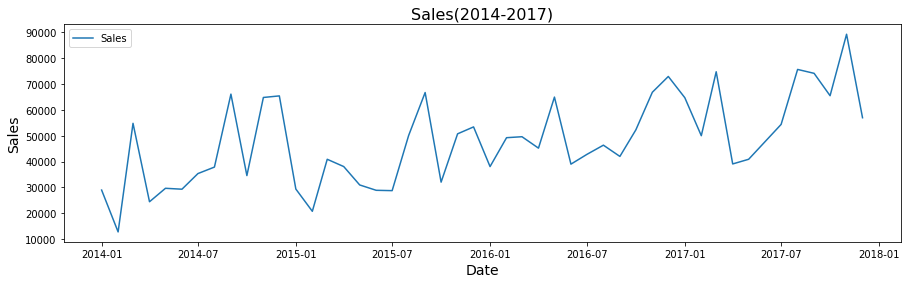

In [ ]:
plt.figure(figsize=[15, 4])
plt.plot(sales_trend, label='Sales')
plt.title('Sales(2014-2017)', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Sales', fontsize=14)
plt.legend()
plt.savefig('databefore')
plt.show()

Text(0.5, 1.0, 'Sales Trend by Year-Month with Rolling Average and Std')

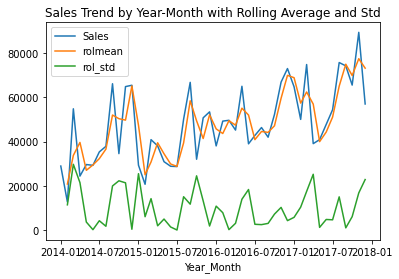

In [ ]:
sales_trend['rolmean']=sales_trend["Sales"].rolling(2).mean()
sales_trend['rol_std']=sales_trend["Sales"].rolling(2).std()
sales_trend.plot()
plt.legend()
plt.title('Sales Trend by Year-Month with Rolling Average and Std')


**2) Augmented Dickey Fuller Test**

Null Hypothesis: Data is non-stationary

Alternate : Data is stationary

In [ ]:
from statsmodels.tsa.stattools import adfuller
X = sales_trend['Sales']
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.177274
p-value: 0.683295
Critical Values:
	1%: -3.606
	5%: -2.937
	10%: -2.607


Inference: 
The p-value is significant at 95% confidence level. Hence, null hypothesis is accepted. **The data is non - stationary.**

**Make the data stationary**

In [ ]:
stdf=sales_trend['Sales']
stdf.columns=['Sales']
stdf.head()

Year_Month
2014-01-01    28953.706
2014-02-01    12743.108
2014-03-01    54801.906
2014-04-01    24428.644
2014-05-01    29639.834
Name: Sales, dtype: float64

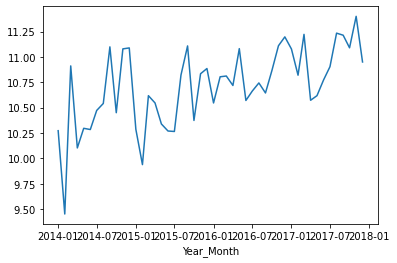

In [ ]:
sales_data_log = np.log(stdf)
sales_data_log.plot()

In [ ]:
result = adfuller(sales_data_log)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.484145
p-value: 0.541339
Critical Values:
	1%: -3.606
	5%: -2.937
	10%: -2.607


Data is still non-stationary

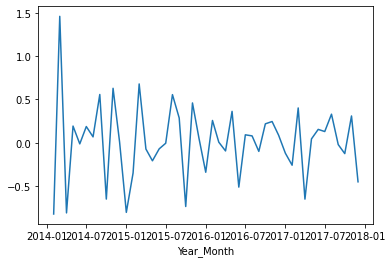

In [ ]:
# create a new dataframe which is shifted by 1 month
sales_shift = sales_data_log - sales_data_log.shift(1)
sales_shift.plot()
plt.savefig('dataafter')

In [ ]:
result = adfuller(sales_shift.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -5.042459
p-value: 0.000018
Critical Values:
	1%: -3.627
	5%: -2.946
	10%: -2.612


Now, the null hypothesis can be rejected.
Hence data is stationary.
Now, we can move on to build the time series model.

**Building the time-series model**

We decide which model suits the data based on the Auto-Correlation Function (ACF) and Partial AutoCorrelation Function(PACF)

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


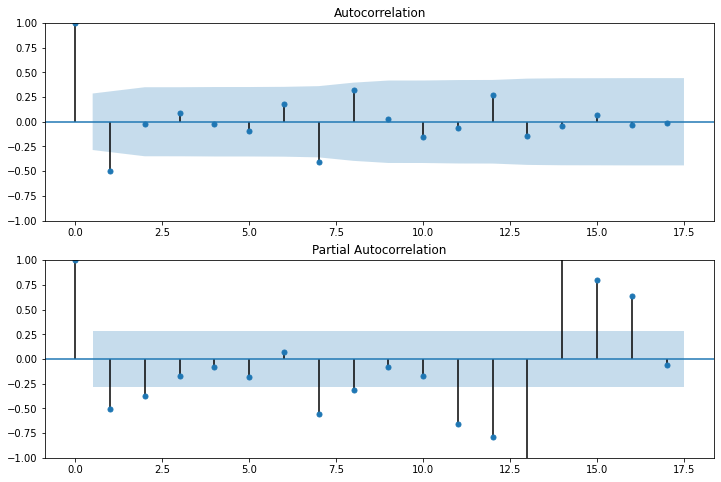

In [ ]:
# check acf & pacf
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(sales_shift.dropna(),ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(sales_shift.dropna(),ax=ax2)
plt.savefig('ACF_PACF')

In [ ]:
pip install statsmodels --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
rmsel=[]

 **AR(3) MODEL**

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)





Test RMSE: 0.272


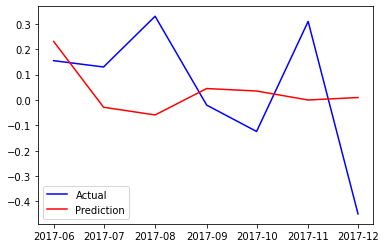

In [ ]:
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
from math import sqrt

X = sales_shift
train, test = X[1:len(X)-7], X[len(X)-7:]

# train autoregression
model = AutoReg(train, lags=3)
model_fit1 = model.fit()

# Predictions
print()
predictions = model_fit1.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)

#metrics
rmse = sqrt(mean_squared_error(test, predictions))
rmsel.append(rmse)
print('\n\nTest RMSE: %.3f' % rmse)

# plot results
plt.plot(test,color='blue',label='Actual')
plt.plot(predictions, color='red',label='Prediction')
plt.legend(loc='best')
plt.savefig('AR(3)')
plt.show()


**MA(2) MODEL**

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)





Test RMSE: 0.261


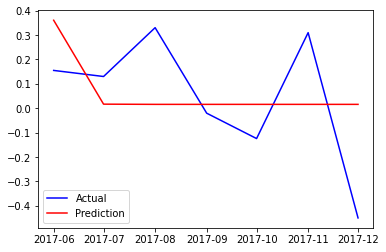

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
ARMA_model = ARIMA(train, order=(0,0,2))
model2 = ARMA_model.fit()

# Predictions
print()
predictions = model2.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)

#metrics
rmse = sqrt(mean_squared_error(test, predictions))
rmsel.append(rmse)
print('\n\nTest RMSE: %.3f' % rmse)

# plot results
plt.plot(test,color='blue',label='Actual')
plt.plot(predictions, color='red',label='Prediction')
plt.legend(loc='best')
plt.savefig('MA(2)')
plt.show()

**ARIMA Model**

In [ ]:
# use ARIMA for forecasting
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(sales_shift,order=(3,1,2))
model_fit3=model.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using z

In [ ]:
sales_shift=sales_shift.to_frame()

In [ ]:
sales_shift['Forecast_ARIMA']=model_fit3.predict(start=25,end=50,dynamic=True)

In [ ]:
rmse = sqrt(mean_squared_error(sales_shift['Sales'][25:].dropna(),sales_shift['Forecast_ARIMA'][25:].dropna()))
rmsel.append(rmse)
print('Test RMSE: %.3f' % rmse)

Test RMSE: 0.258


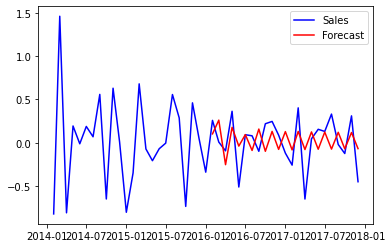

In [ ]:
# plot forecast
plt.plot(sales_shift['Sales'].dropna(),color='blue',label='Sales')
plt.plot(sales_shift['Forecast_ARIMA'].dropna(),color='red',label='Forecast')
plt.legend(loc='best')
plt.savefig('ARIMA')

**SARIMA Model**

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:868: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  ' zeros.' % warning_description)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likeliho

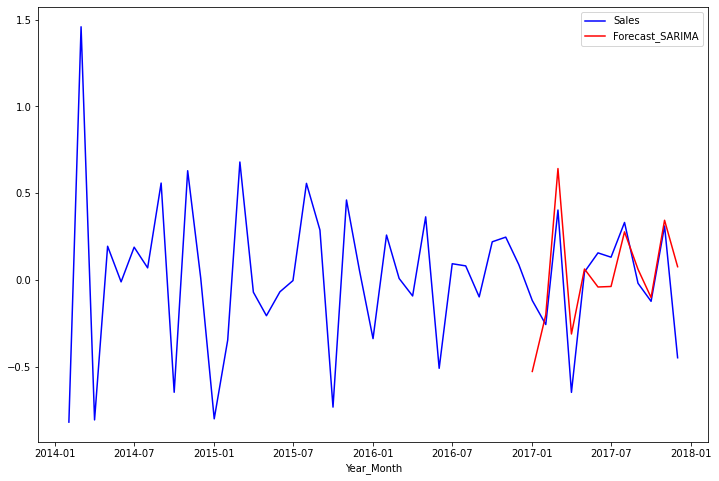

In [ ]:
# use sarimax instead due to seasonality
import statsmodels.api as sm
model=sm.tsa.statespace.SARIMAX(sales_shift['Sales'].dropna(),order=(3, 1, 2),seasonal_order=(3,1,2,12))
model4=model.fit()
sales_shift['Forecast_SARIMA']=model4.predict(start=35,end=50,dynamic=True)
sales_shift[['Sales','Forecast_SARIMA']].plot(color=['blue','red'],figsize=(12,8))
plt.savefig('SARIMAX')

In [ ]:
rmse = sqrt(mean_squared_error(sales_shift['Sales'][36:].dropna(),sales_shift['Forecast_SARIMA'][36:].dropna()))
rmsel.append(rmse)
print('Test RMSE: %.3f' % rmse)

Test RMSE: 0.241


In [ ]:
with open('rmse.txt', 'w') as f:
    for i in rmsel:
      f.write(str(i)+"\n")


We can observe the minimum RMSE is obtained when the data is fit into a SARIMAX model. Hence we use the same to predict future sales(until 2021).

/usr/local/lib/python3.7/dist-packages/pandas/core/indexes/base.py:1963: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  return self._engine.is_monotonic_increasing


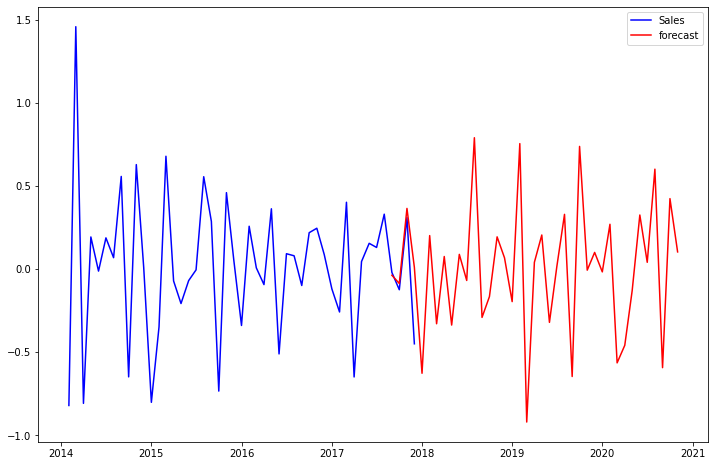

In [ ]:
# extend forecast until 2021
from pandas.tseries.offsets import DateOffset
future_dates=[sales_shift.index[-1]+ DateOffset(months=x)for x in range(0,36)]
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=sales_shift.columns)

future_datest_df.tail()

future_df=pd.concat([sales_shift,future_datest_df])

future_df['forecast'] = model4.predict(start = 43, end = 200, dynamic=True)
future_df[['Sales', 'forecast']].plot(color=['blue','red'],label=['Sales','Forecast'],figsize=(12, 8))
plt.savefig('future')